In [ ]:
'''
Quantifies the state-space shift of crayfish triad trajectories between control and sleep-deprived (SD) conditions.
For each triad, the script computes the Euclidean distance between the centroids of its control and SD trajectories.
A one-sample t-test is then performed on the resulting distribution of distances to assess the statistical significance of
the shift.
'''

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
from scipy.stats import friedmanchisquare, kruskal
#from scikit_posthocs import posthoc_dunn
import matplotlib.font_manager
print(matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf'))

['/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarro

In [ ]:
# Load the positive and negative contact data
positive_contacts_ps = pd.read_csv('csvPrivados_positivos.csv', header=None)
negative_contacts_ps = pd.read_csv('csvPrivados_negativos.csv', header=None)

positive_contacts_c = pd.read_csv('csvControles_positivos.csv', header=None)
negative_contacts_c = pd.read_csv('csvControles_negativos.csv', header=None)

# Concatenate the data to form a single DataFrame
combined_contacts_ps = pd.concat([positive_contacts_ps, negative_contacts_ps], axis=1)
combined_contacts_c = pd.concat([positive_contacts_c, negative_contacts_c], axis=1)

# Display the first few rows of the combined DataFrame
print("Combined Contacts Data (first few rows):")
print(combined_contacts_ps.head())
print(combined_contacts_c.head())

Combined Contacts Data (first few rows):
      0         1         2         3         4         5    0         1  \
0  1.00  1.000000  1.000000  1.000000  1.000000  1.000000  0.1  0.590909   
1  0.34  0.972222  0.886792  0.798319  0.866667  0.452514  1.0  0.590909   
2  0.16  0.486111  0.226415  0.260504  0.691667  0.296089  1.0  1.000000   
3  1.90  1.736111  0.462264  0.478992  0.708333  0.821229  0.3  0.545455   
4  0.68  0.500000  0.537736  0.285714  1.041667  0.290503  2.0  1.454545   

          2         3         4         5  
0  0.837209  0.739130  0.653846  0.444444  
1  0.581395  0.869565  0.653846  0.888889  
2  1.000000  1.000000  1.000000  1.000000  
3  0.069767  0.043478  0.923077  0.333333  
4  0.209302  0.173913  0.461538  0.703704  
          0         1         2         3         4         5         0  \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  0.411765   
1  0.392405  0.316176  0.720588  0.743802  0.460317  0.854545  1.058824   
2  0.455696  

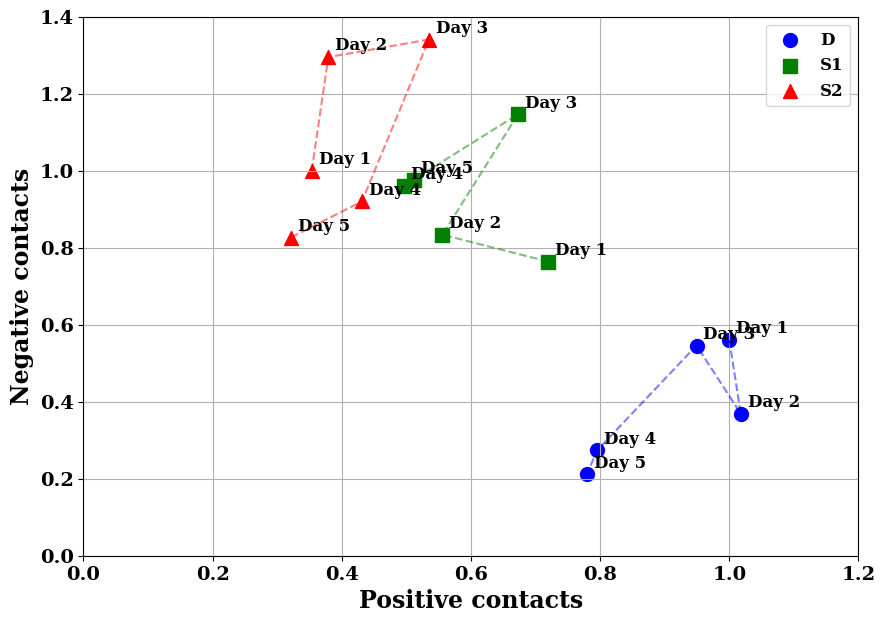

In [ ]:
# Create arrays to store the mean values for each category and day
days = 5
categories = 3
triads = 6

# Initialize arrays to store the coordinates
mean_coords = {
    'D': {'x': [], 'y': []},
    'S1': {'x': [], 'y': []},
    'S2': {'x': [], 'y': []}
}

# Calculate mean coordinates for each category and day
for day in range(days):
    for cat_idx, category in enumerate(['D', 'S1', 'S2']):
        start_idx = day * categories + cat_idx
        mean_coords[category]['x'].append(positive_contacts_ps.iloc[start_idx].mean())
        mean_coords[category]['y'].append(negative_contacts_ps.iloc[start_idx].mean())

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 7))

# Colores y marcadores para cada categoría
colors = {'D': 'blue', 'S1': 'green', 'S2': 'red'}
markers = {'D': 'o', 'S1': 's', 'S2': '^'}

for category in ['D', 'S1', 'S2']:
    x = mean_coords[category]['x']
    y = mean_coords[category]['y']

    # Graficar puntos
    plt.scatter(x, y, c=colors[category], marker=markers[category],
                label=f'{category}', s=100)

    # Conectar puntos con líneas y agregar etiquetas de días
    for i in range(len(x)):
        plt.annotate(f'Day {i+1}', (x[i], y[i]), xytext=(5, 5),
                     textcoords='offset points', fontname='DejaVu Serif', fontweight='bold', fontsize=12)
    plt.plot(x, y, c=colors[category], linestyle='--', alpha=0.5)

# Configuración de ejes y título con formato solicitado
plt.xlabel('Positive contacts', fontsize=17, fontweight='bold', fontname='DejaVu Serif')
plt.ylabel('Negative contacts', fontsize=17, fontweight='bold', fontname='DejaVu Serif')
#plt.title('Análisis vectorial - Control', fontsize=20, fontweight='bold', fontname='DejaVu Serif')

# Formato de los números en los ejes
plt.xticks(fontsize=14, fontweight='bold', fontname='DejaVu Serif')
plt.yticks(fontsize=14, fontweight='bold', fontname='DejaVu Serif')

# Leyenda, cuadrícula y límites
plt.legend(prop={'size': 12, 'weight': 'bold', 'family': 'DejaVu Serif'})
plt.grid(True)
plt.xlim(0, 1.2)
plt.ylim(0, 1.4)
plt.savefig('Analisis_vectorial_privados.jpg', format='jpg', dpi=600)

# Mostrar el gráfico
plt.show()


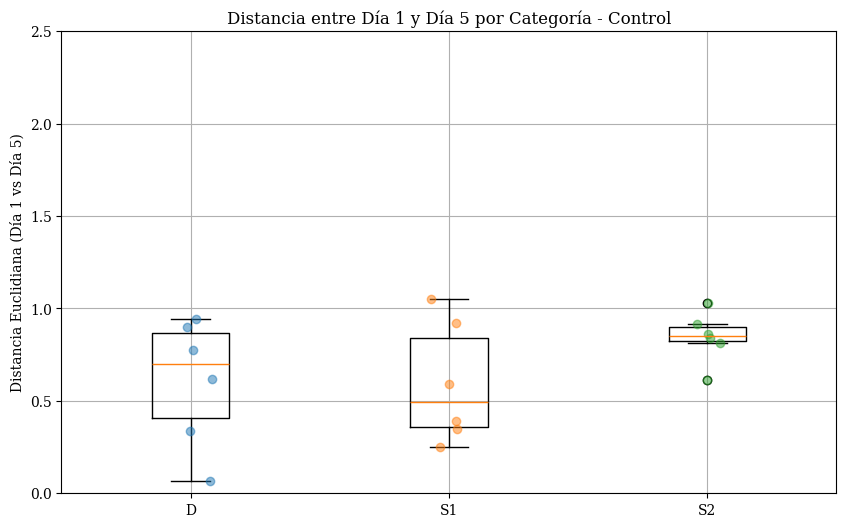

{'D': [0.06404006955347394, 0.7765431553398381, 0.617647059, 0.8973668328077298, 0.9456224877637429, 0.3352698562852273], 'S1': [0.5924006840620771, 0.2481307471936977, 0.9222477572887491, 1.0539879816602373, 0.3909743439569517, 0.34545454600000003], 'S2': [0.8401957657558394, 0.8151905146538819, 0.6127015233900361, 1.0274131772724489, 0.9158558619204775, 0.8614219359278613]}


In [ ]:
# Ajustar el cálculo de distancias con el índice correcto

# Calcular las distancias euclidianas entre día 1 y día 5 para cada acocil y triada
import numpy as np
import matplotlib.pyplot as plt

distances_c = {'D': [], 'S1': [], 'S2': []}

# Ajustar los índices para día 1 y día 5
for cat_idx, category in enumerate(['D', 'S1', 'S2']):
    # Índices para día 1 y día 5
    day1_idx = cat_idx
    day5_idx = 10 + cat_idx  # Ajustado para el índice correcto

    # Obtener coordenadas para cada triada
    for triad in range(triads):
        # Día 1 coordenadas
        x1 = positive_contacts_c.iloc[day1_idx, triad]
        y1 = negative_contacts_c.iloc[day1_idx, triad]

        # Día 5 coordenadas
        x5 = positive_contacts_c.iloc[day5_idx, triad]
        y5 = negative_contacts_c.iloc[day5_idx, triad]

        # Calcular distancia euclidiana
        dist = np.sqrt((x5 - x1)**2 + (y5 - y1)**2)
        distances_c[category].append(dist)

# Crear gráfico de boxplot
plt.figure(figsize=(10, 6))
box_data = [distances[cat] for cat in ['D', 'S1', 'S2']]
bp = plt.boxplot(box_data, labels=['D', 'S1', 'S2'])

# Añadir puntos individuales
for i, category in enumerate(['D', 'S1', 'S2']):
    x = np.random.normal(i + 1, 0.04, size=len(distances_c[category]))
    plt.plot(x, distances_c[category], 'o', alpha=0.5)

plt.ylabel('Distancia Euclidiana (Día 1 vs Día 5)')
plt.title('Distancia entre Día 1 y Día 5 por Categoría - Control')
plt.grid(True)
plt.ylim(0, 2.5)
plt.show()

print(distances_c)

Cada dia por separado

<ipython-input-46-d3dba44e53cf>:12: RuntimeWarning: invalid value encountered in scalar divide
  pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])


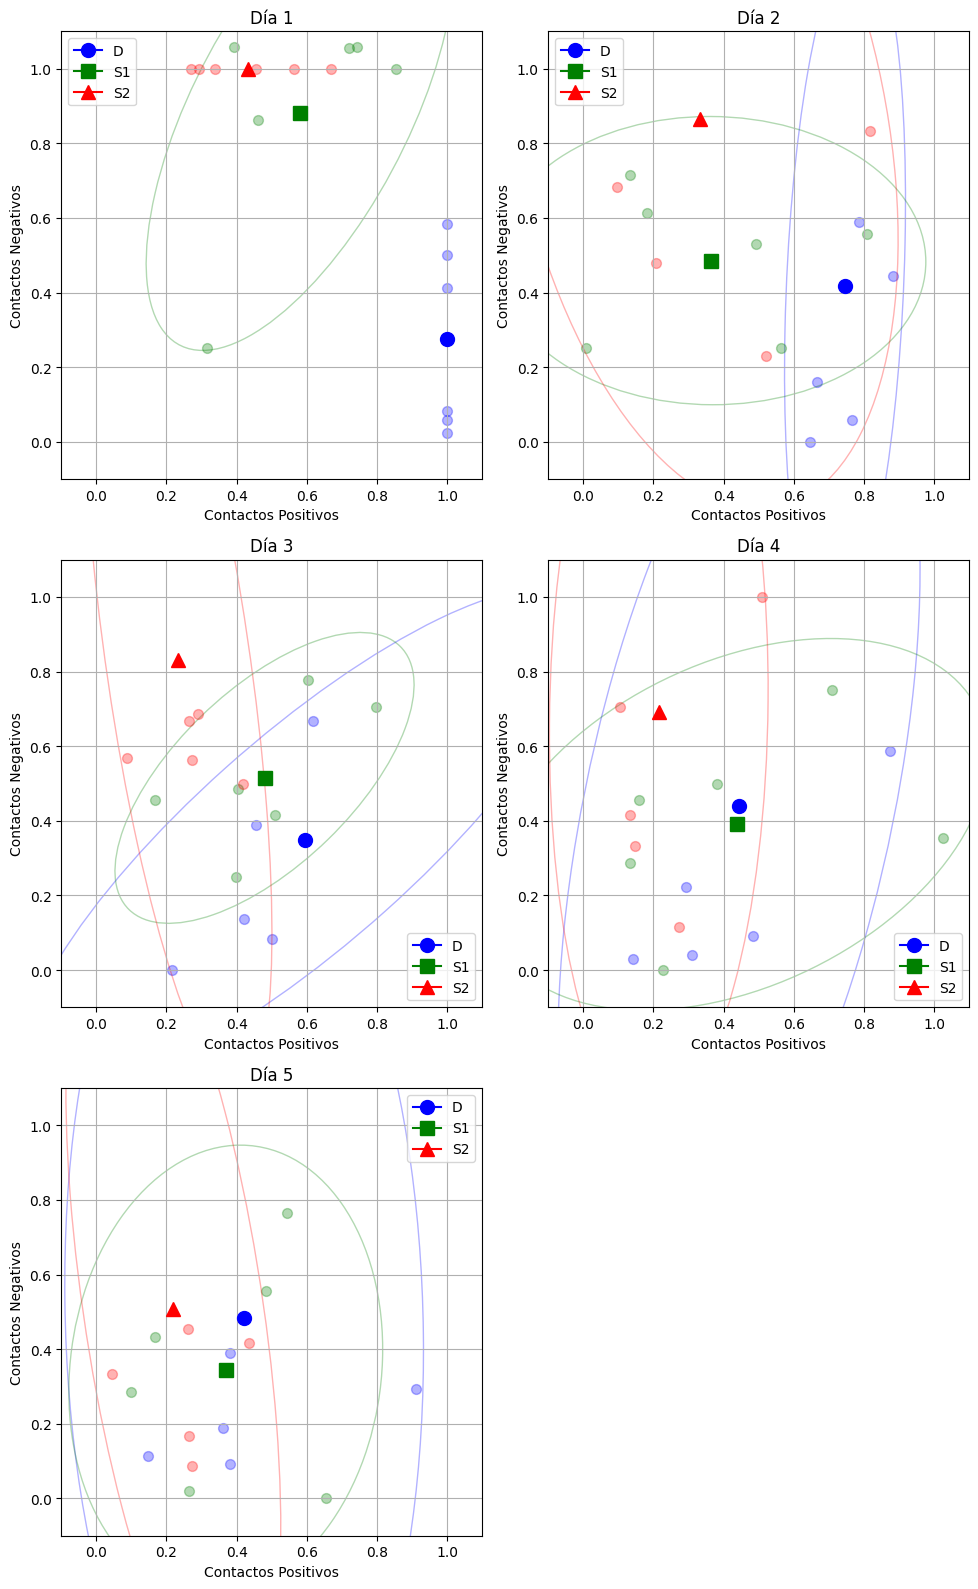

In [ ]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=2.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])

    # Using a special case to obtain the eigenvalues of this two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from the squareroot of its variance
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # Calculating the standard deviation of y from the squareroot of its variance
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

# Crear subplots para cada d\u00eda
fig, axes = plt.subplots(3, 2, figsize=(10, 16))
axes = axes.flatten()

# Colores y marcadores para cada categor\u00eda
colors = {'D': 'blue', 'S1': 'green', 'S2': 'red'}
markers = {'D': 'o', 'S1': 's', 'S2': '^'}

# Para cada d\u00eda
for day in range(days):
    ax = axes[day]

    # Para cada categor\u00eda
    for cat_idx, category in enumerate(['D', 'S1', 'S2']):
        # Extraer datos de las 6 triadas para este d\u00eda y categor\u00eda
        start_idx = day * categories + cat_idx
        x_data = positive_contacts.iloc[start_idx]
        y_data = negative_contacts.iloc[start_idx]

        # Calcular promedio
        x_mean = x_data.mean()
        y_mean = y_data.mean()

        # Plotear punto promedio
        ax.plot(x_mean, y_mean, color=colors[category], marker=markers[category],
                markersize=10, label=f'{category}')

        # A\u00f1adir elipse de confianza
        confidence_ellipse(x_data, y_data, ax, n_std=2.0, edgecolor=colors[category],
                         alpha=0.3)

        # Plotear puntos individuales
        ax.scatter(x_data, y_data, color=colors[category], alpha=0.3, s=50)

    ax.set_xlabel('Contactos Positivos')
    ax.set_ylabel('Contactos Negativos')
    ax.set_title(f'D\u00eda {day+1}')
    ax.legend()
    ax.grid(True)

    # Ajustar l\u00edmites para mejor visualizaci\u00f3n
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)

# Ajustar layout
plt.tight_layout()
axes[5].set_visible(False)  # Ocultar el \u00faltimo subplot vac\u00edo
plt.show()


In [ ]:
# Step 2: Perform Hotelling's T-squared test for multivariate comparison of categories (D vs S1, D vs S2, S1 vs S2) for each day
from statsmodels.multivariate.manova import MANOVA

print("MULTIVARIATE COMPARISON OF CATEGORIES FOR EACH DAY:")
print("===================================================")

# Function to perform Hotelling's T-squared test
for day in range(days):
    print(f"\
DAY {day+1}")
    print("---------")

    # Extract coordinates for each category on this day
    D_coords = np.array(coordinates['D'][day*triads:(day+1)*triads])
    S1_coords = np.array(coordinates['S1'][day*triads:(day+1)*triads])
    S2_coords = np.array(coordinates['S2'][day*triads:(day+1)*triads])

    # Prepare data for MANOVA
    data = np.vstack([D_coords, S1_coords, S2_coords])
    labels = ['D']*triads + ['S1']*triads + ['S2']*triads
    df = pd.DataFrame(data, columns=['Positive', 'Negative'])
    df['Category'] = labels

    # Perform MANOVA
    maov = MANOVA.from_formula('Positive + Negative ~ Category', data=df)
    maov_results = maov.mv_test()
    print(maov_results)